# Search for range of Float Model

1. Load 1 image, preprocess it -> find input range
2. Run inference and store min, max of activations per layer
3. Evaluate correctness of output result
4. Plot max activation per layer

### Import Packages

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications.vgg16 import preprocess_input

### Load Float Model

In [2]:
# SavedModelsPath = 'C:/Programming_Files/JupyterVSCode/Binary_Classification_Transfer_Learning/CatsDogs/SavedModels'
# filepath = f'{SavedModelsPath}/CD2/CD2_P1_003_val0.0486.keras'
# model = tf.keras.models.load_model(filepath)
model = tf.keras.applications.VGG16(weights='imagenet', include_top=True)

### Load Image & Preprocess

In [ ]:
img_size = (224, 224, 3)

def load_and_preprocess_image(file_path):
    img = tf.keras.utils.load_img(file_path, target_size=img_size)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = preprocess_input(img_array)
    # img_array = img_array[..., ::-1]  # Reverses the last axis (channels), RGB -> BGR
    img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

img_path = "C:/Users/Aris_Work/Downloads/n01641577_bullfrog.jpg"
input_img = load_and_preprocess_image(img_path)

In [6]:
print(np.min(input_img))
print(np.max(input_img))

-123.68
151.061


### Run Inference & Get all Activations

In [ ]:
# Create model to output all intermediate layer outputs with activations
layer_outputs = []
layer_names = []
for layer in model.layers:
    # Skip layers without activation
    if hasattr(layer, 'activation') and layer.activation is not None:
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

In [ ]:
img_size = (224, 224, 3)
num_samples = 20

# Model that returns activations
activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

# Run forward pass
activations = activation_model(input_img)

min_val = {key: tf.constant(float('inf')) for key in layer_names}
max_val = {key: tf.constant(float('-inf')) for key in layer_names}


for name, activation in zip(layer_names, activations):
    min_val[name] = tf.reduce_min(activation).numpy()
    max_val[name] = tf.reduce_max(activation).numpy()
    print(f"{name:20s} | min: {min_val[name]:8.3f} | max: {max_val[name]:8.3f}")

block1_conv1         | min:    0.000 | max:  645.732
block1_conv2         | min:    0.000 | max: 2354.355
block2_conv1         | min:    0.000 | max: 3994.054
block2_conv2         | min:    0.000 | max: 6341.353
block3_conv1         | min:    0.000 | max: 9229.803
block3_conv2         | min:    0.000 | max: 9626.003
block3_conv3         | min:    0.000 | max: 13799.399
block4_conv1         | min:    0.000 | max: 6980.735
block4_conv2         | min:    0.000 | max: 3596.921
block4_conv3         | min:    0.000 | max: 2661.336
block5_conv1         | min:    0.000 | max: 1354.409
block5_conv2         | min:    0.000 | max:  482.716
block5_conv3         | min:    0.000 | max:  254.166
fc1                  | min:    0.000 | max:   40.273
fc2                  | min:    0.000 | max:    9.796
predictions          | min:    0.000 | max:    0.954


In [9]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

# Decode and print top 3 predictions
print(decode_predictions(activations[-1], top=3)[0])

[('n01641577', 'bullfrog', np.float32(0.95375)), ('n01644900', 'tailed_frog', np.float32(0.038671993)), ('n01644373', 'tree_frog', np.float32(0.003963672))]


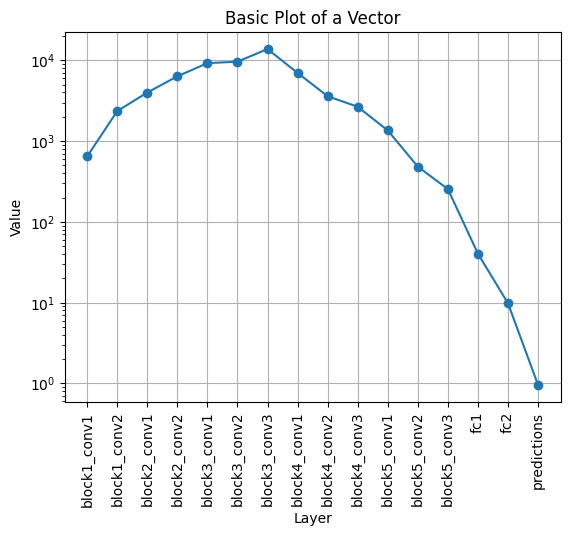

In [10]:
import matplotlib.pyplot as plt

keys = list(max_val.keys())
values = list(max_val.values())

# Plotting the vector
plt.plot(keys, values, marker='o')  # marker='o' adds dots at data points

# Adding labels and title (optional)
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Layer')
plt.ylabel('Value')
plt.title('Basic Plot of a Vector')

# Show grid (optional)
plt.grid(True)

# Show the plot
plt.show()